<a href="https://colab.research.google.com/github/kunal24bit/Data-Pre-processing/blob/main/Missing_values_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Feature Engineering- Missing Values Part 1**

Lifecycle of a Data Science Projects

1. Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
2. Feature Engineering---Handling Missing Values

Why are their Missing values?? 

1. Survey--Depression Survey

2. They hesitate to put down the information

3. Survey informations are not that valid

4. Men--salary

5. Women---age

6. People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

Types of Missing data:

1. Missing at Random(MAR)
2. Missing Completely at Random(MCAR)
3. Missing not at Random(MNAR)


**Missing Completely at Random**: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [9]:
import pandas as pd

In [21]:
df = pd.read_csv("titanic.csv")

In [45]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see that in column "Age", "Cabin" and "Embarked", we have missing values.

In [24]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**Missing Data not at Random**: Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [39]:
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

#Percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [46]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [59]:
df[["Survived",'cabin_null']].head(10)

,Survived,cabin_null
0,0,1
1,1,0
2,1,1
3,1,0
4,0,1
5,0,1
6,0,0
7,0,1
8,1,1
9,1,1


In [48]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

**Missing at Random(MAR)**: Missing at random means that the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data.

1. Men hide their salary
2. Women hide their age.

### All the techniques of handling missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

**Mean/ Median/Mode replacement**

When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [62]:
df1 = pd.read_csv("titanic.csv", usecols=["Age", "Fare", "Survived"])

In [63]:
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [64]:
#Percentage of null values
df1.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [67]:
def impute_nan(df1, variable, median):
  df1[variable+"_median"] = df1[variable].fillna(median)


In [91]:
median = df1.Age.median()
median

28.0

In [88]:
impute_nan(df1, "Age", median)

In [92]:
df.tail()

,Survived,Age,Fare
886,0,27.0,13.00
887,1,19.0,30.00
888,0,NaN,23.45
889,1,26.0,30.00
890,0,32.0,7.75


In [94]:
print(df1["Age"].std())
print(df1["Age_median"].std())


14.526497332334044
13.019696550973194


In [98]:
import matplotlib.pyplot as plt

%matplotlib inline


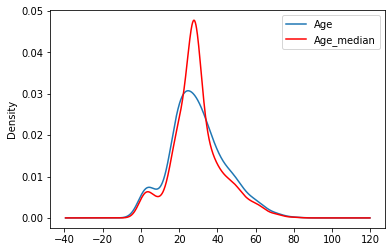

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1['Age'].plot(kind='kde', ax=ax) #kde stands for kernel density plot which use to generate kernel density estimate plot using Gaussian Kernels.
df1.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

**Advantages And Disadvantages of Mean/Median Imputation**

**Advantages**

1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset #### Disadvantages
3. Change or Distortion in the original variance
4. Impacts Correlation